In [36]:
!pip install pandas

In [37]:
import numpy as np
import pandas as pd

In [38]:

import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Neural net moduel
from keras.models import Sequential # create a linear stack of neural network layers.
from keras.layers import Dense, Dropout # is a module that provides various layer types, including Dense and Dropout, used to define the architecture of the neural network.
from keras.callbacks import EarlyStopping # callback is used to monitor the validation loss during training. If the validation loss stops improving for a specified number of

In [39]:
file=pd.read_csv('housing.csv')
file

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [40]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [41]:
file.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [42]:
file.dropna(axis=0,inplace=True)

In [43]:
file.size

204330

In [44]:
file['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [45]:
file['ocean_proximity']=file['ocean_proximity'].map({'NEAR BAY':0,'<1H OCEAN':1,'INLAND':2,'NEAR OCEAN':3,'ISLAND':4})

In [46]:
file['ocean_proximity'].value_counts()

,count
ocean_proximity,
1,9034
2,6496
3,2628
0,2270
4,5


In [47]:
x=file.drop('median_house_value',axis=1)
y=file['median_house_value']
y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
5,269700.0
6,299200.0
7,241400.0
8,226700.0
9,261100.0


In [48]:
x=np.array(x)
y=np.array(y)
x

array([[-122.23  ,   37.88  ,   41.    , ...,  126.    ,    8.3252,
           0.    ],
       [-122.22  ,   37.86  ,   21.    , ..., 1138.    ,    8.3014,
           0.    ],
       [-122.24  ,   37.85  ,   52.    , ...,  177.    ,    7.2574,
           0.    ],
       ...,
       [-121.22  ,   39.43  ,   17.    , ...,  433.    ,    1.7   ,
           2.    ],
       [-121.32  ,   39.43  ,   18.    , ...,  349.    ,    1.8672,
           2.    ],
       [-121.24  ,   39.37  ,   16.    , ...,  530.    ,    2.3886,
           2.    ]])

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)
x_test.shape

(8174, 9)

In [50]:
y_test.shape

(8174,)

In [51]:
x_test

array([[-117.24  ,   32.79  ,   20.    , ...,  254.    ,    3.1838,
           3.    ],
       [-121.29  ,   38.01  ,    2.    , ...,  957.    ,    4.4871,
           2.    ],
       [-118.14  ,   33.92  ,   31.    , ...,  801.    ,    3.2237,
           1.    ],
       ...,
       [-120.69  ,   37.77  ,   46.    , ...,   80.    ,    3.3182,
           2.    ],
       [-117.01  ,   32.75  ,   26.    , ...,  687.    ,    3.9545,
           1.    ],
       [-117.31  ,   34.17  ,   25.    , ...,  569.    ,    3.0078,
           2.    ]])

In [52]:
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_test

array([[0.71820956, 0.02656748, 0.37254902, ..., 0.041605  , 0.185094  ,
        0.75      ],
       [0.30620549, 0.58129649, 0.01960784, ..., 0.15721099, 0.27497552,
        0.5       ],
       [0.6266531 , 0.1466525 , 0.58823529, ..., 0.13155731, 0.18784568,
        0.25      ],
       ...,
       [0.36724313, 0.55579171, 0.88235294, ..., 0.01299128, 0.19436284,
        0.5       ],
       [0.74160732, 0.02231668, 0.49019608, ..., 0.11281039, 0.23824499,
        0.25      ],
       [0.7110885 , 0.17321998, 0.47058824, ..., 0.09340569, 0.17295624,
        0.5       ]])

In [53]:
x_train.shape[1]

9

In [54]:
model = Sequential([
    #input layer
    Dense(1000, input_shape=(x_train.shape[1],), activation='relu'),
    Dropout(0.2),
    #two hidden layers
    Dense(500, activation='relu'),
    Dropout(0.2),
    Dense(250, activation='relu'),
    #output layer
    Dense(1,activation='linear')
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1000)                │          10,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             251 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 636,001 (2.43 MB)

 Trainable params: 636,001 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
es = EarlyStopping(monitor='val_loss',mode='min',patience=50, restore_best_weights=True)

In [57]:
history = model.fit(x_train, y_train, validation_data= (x_test, y_test), callbacks=[es], epochs=20, batch_size=50, verbose=1)

Epoch 1/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 5285323264.0000 - mae: 52501.8125 - val_loss: 4892627968.0000 - val_mae: 51194.8242
Epoch 2/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 5296342528.0000 - mae: 52201.3828 - val_loss: 4928252928.0000 - val_mae: 49149.2969
Epoch 3/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 5041975808.0000 - mae: 50989.5820 - val_loss: 4680297984.0000 - val_mae: 49817.8945
Epoch 4/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 5088627200.0000 - mae: 50917.6250 - val_loss: 4693615104.0000 - val_mae: 51307.9414
Epoch 5/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 4948161024.0000 - mae: 49924.3906 - val_loss: 4607869440.0000 - val_mae: 47560.2617
Epoch 6/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 4815598080.0000 - mae: 49415.2305 - val_loss: 4438718976.0000 - val_mae: 48429.7422
Epoch 7/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 4735857664.0000 - mae: 49194.8672 - val_loss: 4806030848.0000 - val_

In [58]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error

y_pred = model.predict(x_test)
print("mae :", mean_absolute_error(y_test,y_pred))
print("mse :", mean_squared_error(y_test,y_pred))
print("mae :", mean_squared_log_error(y_test,y_pred))
print("score :", r2_score(y_test,y_pred))

256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
mae : 45395.82721916481
mse : 4120223596.833579
mae : 0.09802508725489761
score : 0.686704870653291


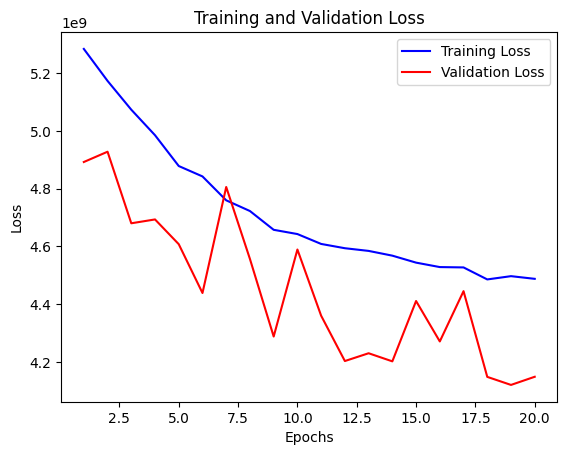

In [59]:
# Get the training and validation loss from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)
# Plot the training and validation loss
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')

# Label the plot
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


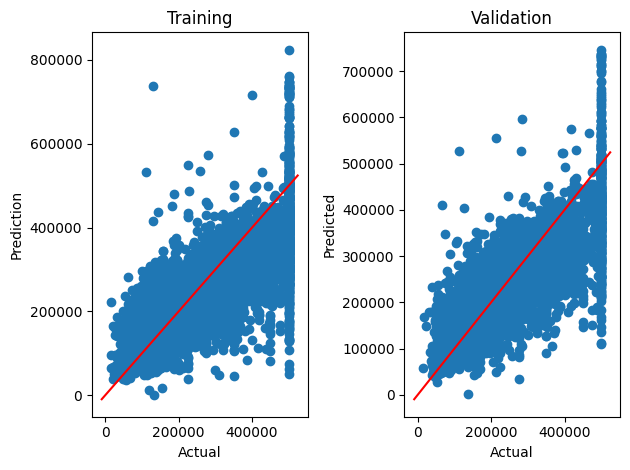

In [60]:
# Specify the dimensions
fig, axes = plt.subplots(1,2)

# This makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(x_train))
axes[0].set_xlabel('Actual', fontsize=10)
axes[0].set_ylabel('Prediction', fontsize=10)
axes[0].set_title('Training')

# Add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

# Validation Results
axes[1].scatter(x=y_test, y=model.predict(x_test))
axes[1].set_xlabel('Actual', fontsize=10)
axes[1].set_ylabel('Predicted', fontsize=10)
axes[1].set_title('Validation')

# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# Tight layout
fig.tight_layout()
plt.show()

In [64]:
def pred(longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity):
    features = np.array([longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity])
    features_scaled = scaler.fit_transform([features])
    results = model.predict(features_scaled).reshape(1,-1)
    return results[0]

In [65]:
longitude = -122.2300
latitude  = 37.8800
housing_median_age  = 41.0000
total_rooms        = 880.0000
total_bedrooms   =  129.0000
population     = 322.0000
households          =    126.0000
median_income       =      8.3252
ocean_proximity       =     3.0000

price = pred(longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [66]:
price

array([529984.3], dtype=float32)

In [68]:
model.save("model_ann.h5")

import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))